In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

ModuleNotFoundError: No module named 'umap'

In [2]:
image_dataset = np.load("datasets/unlabelled_train_data_images.npy")

In [4]:
image_dataset.shape

(60000, 1, 28, 28)

### Flattening of the data

In [5]:
X_flat = image_dataset.reshape(60000, -1)

In [6]:
X_flat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Normalising the data

In [7]:
# Normalize pixel values to [0, 1]
X_normalized = X_flat.astype('float32') / 255.0

In [8]:
def view_img(df, idx):
    img = df[idx]
    img = img.squeeze()
    plt.imshow(img, cmap='gray')
    # plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

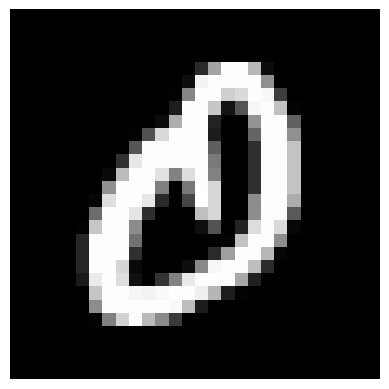

In [11]:
view_img(image_dataset,2)

### Using PCA

In [14]:
# Reduce to 50 dimensions (retains most variance)
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_normalized)

In [23]:
X_pca_non_normal = pca.fit_transform(X_flat)

#### Non-normalised

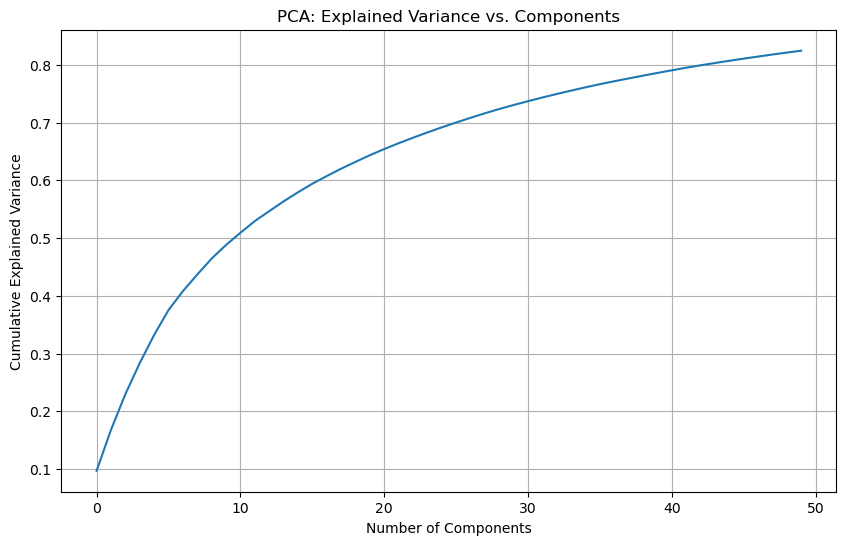

In [24]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance vs. Components')
plt.grid(True)
plt.show()

#### Normalised

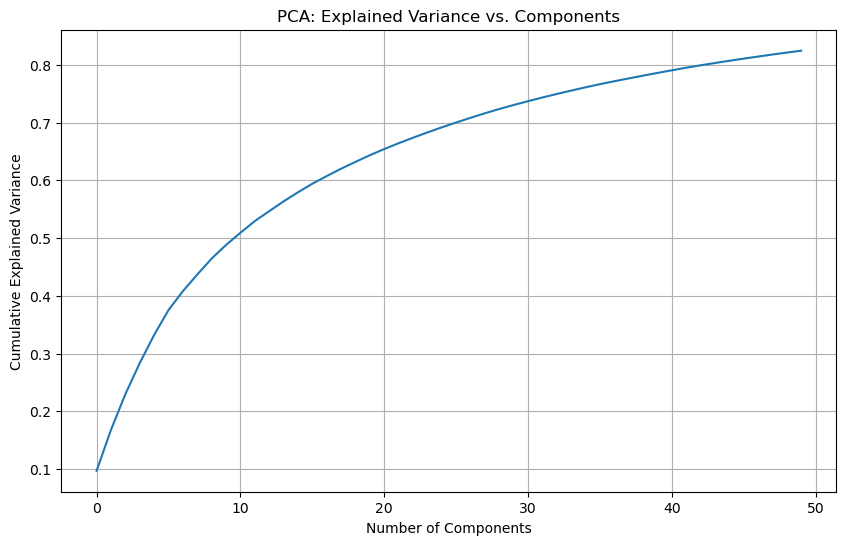

In [25]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance vs. Components')
plt.grid(True)
plt.show()

### T-SNE

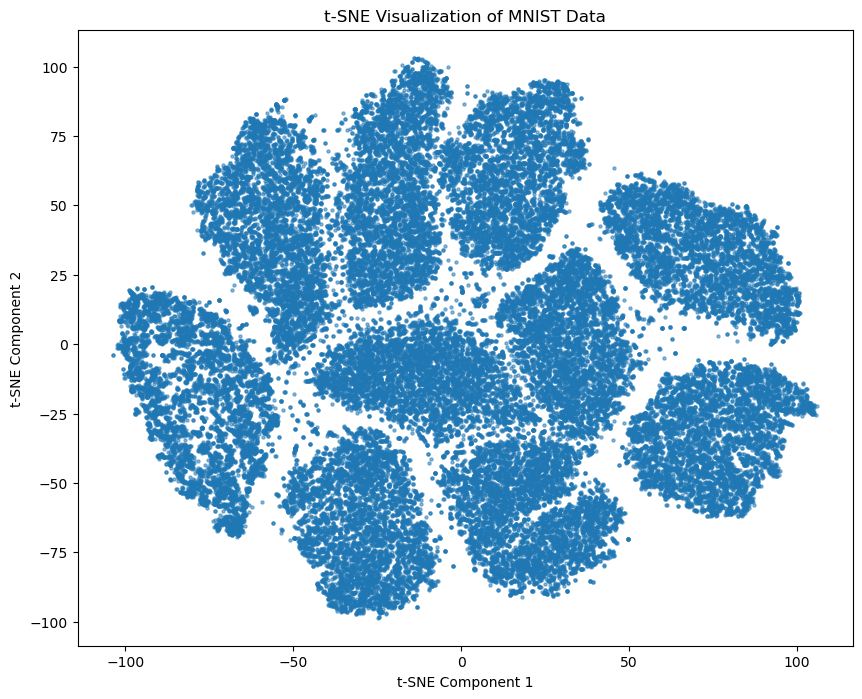

In [22]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_normalized)

# Plot the embeddings
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=5, alpha=0.5)
plt.title('t-SNE Visualization of MNIST Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [16]:
# Cluster into 10 groups (since MNIST has 10 classes)
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
# Project to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

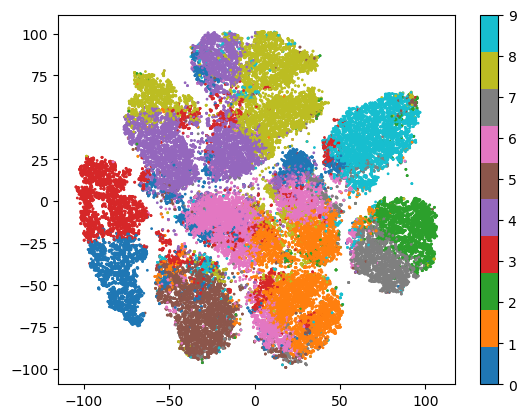

In [19]:
# Plot clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='tab10', s=1)
plt.colorbar()
plt.show()

In [20]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {score:.3f}")  # Closer to 1 = better

Silhouette Score: 0.085
